In [488]:
#Muhammad Afnan Akram    Email: i190588@nu.edu.pk
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from pandas import DataFrame
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
df=pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Null values
First we check the attributes with null values and then replace the null values with mean.


In [489]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [490]:
#finding the mean of each column
columns_mean = df.mean()
print(columns_mean)
df.describe()

male                 0.429245
age                 49.580189
education            1.979444
currentSmoker        0.494104
cigsPerDay           9.005937
BPMeds               0.029615
prevalentStroke      0.005896
prevalentHyp         0.310613
diabetes             0.025708
totChol            236.699523
sysBP              132.354599
diaBP               82.897759
BMI                 25.800801
heartRate           75.878981
glucose             81.963655
TenYearCHD           0.151887
dtype: float64


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [491]:
#filling the 'Nan' with mean
df1 = df.fillna(columns_mean)
print(df1)


      male  age  education  currentSmoker  cigsPerDay    BPMeds  \
0        1   39        4.0              0         0.0  0.000000   
1        0   46        2.0              0         0.0  0.000000   
2        1   48        1.0              1        20.0  0.000000   
3        0   61        3.0              1        30.0  0.000000   
4        0   46        3.0              1        23.0  0.000000   
...    ...  ...        ...            ...         ...       ...   
4235     0   48        2.0              1        20.0  0.029615   
4236     0   44        1.0              1        15.0  0.000000   
4237     0   52        2.0              0         0.0  0.000000   
4238     1   40        3.0              0         0.0  0.000000   
4239     0   39        3.0              1        30.0  0.000000   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0  

In [492]:
#Again checking for Null values
df1.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Scaling
Now we scale the attributes on 0 and 1

In [493]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 
df_scaled = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

In [494]:
df_scaled

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.333333,0.0,0.000000,0.000000,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.000000,1.0,0.285714,0.000000,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.666667,1.0,0.428571,0.000000,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.666667,1.0,0.328571,0.000000,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,0.421053,0.333333,1.0,0.285714,0.029615,0.0,0.0,0.0,0.239389,0.224586,0.253968,0.156568,0.404040,0.129944,0.0
4236,0.0,0.315789,0.000000,1.0,0.214286,0.000000,0.0,0.0,0.0,0.174873,0.203310,0.412698,0.087736,0.424242,0.118541,0.0
4237,0.0,0.526316,0.333333,0.0,0.000000,0.000000,0.0,0.0,0.0,0.275042,0.236407,0.370370,0.143723,0.363636,0.189266,0.0
4238,1.0,0.210526,0.666667,0.0,0.000000,0.000000,0.0,1.0,0.0,0.132428,0.271868,0.529101,0.243820,0.232323,0.090395,0.0


# X and Y Labeling



In [495]:
# clarify what is y and what is x label
X = df_scaled.drop(['TenYearCHD'], axis = 1)
Y = df_scaled['TenYearCHD']
X


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.184211,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.0,0.368421,0.333333,0.0,0.000000,0.000000,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695
2,1.0,0.421053,0.000000,1.0,0.285714,0.000000,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.0,0.763158,0.666667,1.0,0.428571,0.000000,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.0,0.368421,0.666667,1.0,0.328571,0.000000,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,0.421053,0.333333,1.0,0.285714,0.029615,0.0,0.0,0.0,0.239389,0.224586,0.253968,0.156568,0.404040,0.129944
4236,0.0,0.315789,0.000000,1.0,0.214286,0.000000,0.0,0.0,0.0,0.174873,0.203310,0.412698,0.087736,0.424242,0.118541
4237,0.0,0.526316,0.333333,0.0,0.000000,0.000000,0.0,0.0,0.0,0.275042,0.236407,0.370370,0.143723,0.363636,0.189266
4238,1.0,0.210526,0.666667,0.0,0.000000,0.000000,0.0,1.0,0.0,0.132428,0.271868,0.529101,0.243820,0.232323,0.090395


In [496]:
Y

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
4235    0.0
4236    0.0
4237    0.0
4238    0.0
4239    0.0
Name: TenYearCHD, Length: 4240, dtype: float64

# Check balance of outcome variable

Class 0: 3596
Class 1: 644
Proportion: 5.58 : 1


C:\Users\afnan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


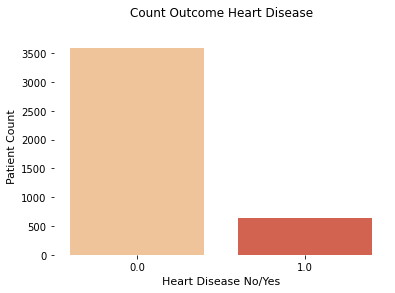

In [497]:
import seaborn as sns
import matplotlib.pyplot as plt
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.show()

# 
As we see above our dataset is not balance.We can see that the proportion is 5.57:1 which is not well balanced. One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading.

In [498]:
# Seperate the both classes 0 and 1
Heart_diseases_yes=df_scaled[df_scaled['TenYearCHD']==1]
Heart_diseases_no=df_scaled[df_scaled['TenYearCHD']==0]

In [499]:
Heart_diseases_yes

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
6,0.0,0.815789,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.166384,0.257683,0.243386,0.425836,0.161616,0.127119,1.0
15,0.0,0.157895,0.333333,1.0,0.285714,0.0,0.0,1.0,0.0,0.193548,0.267139,0.444444,0.140814,0.515152,0.084746,1.0
17,0.0,0.368421,0.333333,1.0,0.285714,0.0,0.0,0.0,0.0,0.312394,0.134752,0.317460,0.190015,0.363636,0.138418,1.0
25,1.0,0.394737,1.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.317487,0.087470,0.211640,0.209404,0.181818,0.073446,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,1.0,0.473684,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.259762,0.167849,0.275132,0.152933,0.363636,0.090395,1.0
4223,1.0,0.631579,1.000000,0.0,0.000000,1.0,0.0,1.0,0.0,0.305603,0.309693,0.529101,0.148812,0.464646,0.098870,1.0
4226,1.0,0.684211,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.213922,0.198582,0.380952,0.254726,0.232323,0.101695,1.0
4232,1.0,0.947368,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.117148,0.399527,0.518519,0.184198,0.161616,0.110169,1.0


In [500]:

print(Heart_diseases_yes.shape,Heart_diseases_no.shape)

(644, 16) (3596, 16)


# Resampling imbalanced Dataset
We will use Oversampling for Handling imbalanced data.

In [501]:
#from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler()
# resampling X, y
X1, Y1 = ros.fit_resample(X, Y)

In [502]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y1)))

Original dataset shape Counter({0.0: 3596, 1.0: 644})
Resampled dataset shape Counter({0.0: 3596, 1.0: 3596})


In [503]:
X1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7187,1.0,0.631579,0.000000,1.0,0.571429,0.0,0.0,0.0,0.0,0.320883,0.132388,0.275132,0.190015,0.363636,0.087571
7188,1.0,0.421053,1.000000,1.0,0.285714,0.0,0.0,1.0,0.0,0.258065,0.243499,0.444444,0.125545,0.585859,0.115819
7189,0.0,0.736842,0.333333,0.0,0.000000,0.0,0.0,1.0,0.0,0.385399,0.229314,0.486772,0.238488,0.363636,0.163842
7190,0.0,0.736842,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.237691,0.224586,0.349206,0.161173,0.515152,0.152542


In [504]:

Y1 = pd.DataFrame(data=Y1, columns=['TenYearCHD'])
Y1

,TenYearCHD
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
7187,1.0
7188,1.0
7189,1.0
7190,1.0


# Classification
Now split the model into test and train

In [505]:
#Import sklearn for spliting data into Training and testing where 80% is traing and 20% is testing.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=1)

In [506]:
print(len(X_train))
print(len(X_test))

5753
1439


In [507]:
combineX1Y1=pd.concat([X1, Y1], axis=1, join='inner')
combineX1Y1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7187,1.0,0.631579,0.000000,1.0,0.571429,0.0,0.0,0.0,0.0,0.320883,0.132388,0.275132,0.190015,0.363636,0.087571,1.0
7188,1.0,0.421053,1.000000,1.0,0.285714,0.0,0.0,1.0,0.0,0.258065,0.243499,0.444444,0.125545,0.585859,0.115819,1.0
7189,0.0,0.736842,0.333333,0.0,0.000000,0.0,0.0,1.0,0.0,0.385399,0.229314,0.486772,0.238488,0.363636,0.163842,1.0
7190,0.0,0.736842,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.237691,0.224586,0.349206,0.161173,0.515152,0.152542,1.0


Class 0: 3596
Class 1: 3596
Proportion: 1.0 : 1


C:\Users\afnan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


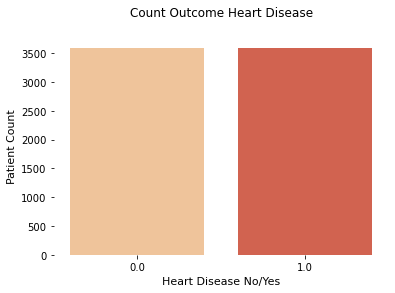

In [508]:
target_count = combineX1Y1.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
sns.countplot(combineX1Y1.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.show()

# Logistic Regression
Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
Precision score: When it predicts yes, how often is it correct? Precision=True Positive/(True positive+False Positive)
recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/aTP+FN

In [509]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
normalized_df_reg = LogisticRegression().fit(X_train, y_train)
normalized_df_reg_pred = normalized_df_reg.predict(X_test)
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"****** Logistic Regression Method Result ******")
print(f"Test Accuracy :         {round(acc,3)*100}%")
acct=accuracy_score(y_train, normalized_df_reg.predict(X_train))
print(f"Train Accuracy :   {round(acct,3)*100}%")
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"f1 score :         {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"Precision score :  {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"Recall score :     {round(recall,3)*100}%")


****** Logistic Regression Method Result ******
Test Accuracy :         66.4%
Train Accuracy :   68.0%
f1 score :         66.0%
Precision score :  66.2%
Recall score :     65.7%


C:\Users\afnan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


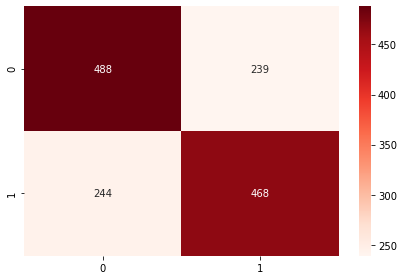

In [510]:
# plotting confusion matrix Logist Reg
cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()




# DecisionTreeClassifier

In [511]:
dtc_up = DecisionTreeClassifier()
dtc_up.fit(X_train, y_train)
normalized_df_dtc_pred = dtc_up.predict(X_test)
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"****** Decision Tree Method Result ******")
print(f"Test Accuracy :    {round(acc,3)*100}%")
acct=accuracy_score(y_train, dtc_up.predict(X_train))
print(f"Train Accuracy :   {round(acct,3)*100}%")
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"f1 score :         {round(f1,3)*100}%")
print(f"Precision score :  {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"Recall score :     {round(recall,3)*100}%")

****** Decision Tree Method Result ******
Test Accuracy :    89.7%
Train Accuracy :   100.0%
f1 score :         90.5%
Precision score :  66.2%
Recall score :     99.0%


Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

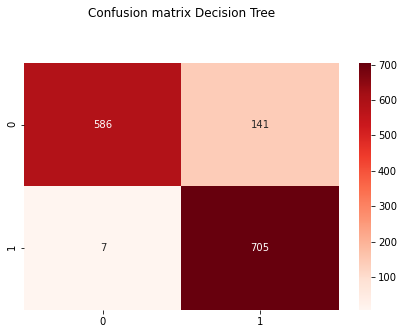

In [512]:
# plotting confusion matrix Decision Tree
cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

# KNN

In [521]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
normalized_df_knn_pred = knn.predict(X_test)
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"****** KNN Method Result ******")
print(f"Test Accuracy :    {round(acc,3)*100}%")
acct=accuracy_score(y_train, knn.predict(X_train))
print(f"Train Accuracy :   {round(acct,3)*100}%")
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"f1 score :         {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"Precision score :  {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"Recall score :     {round(recall,3)*100}%")

C:\Users\afnan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


****** KNN Method Result ******
Test Accuracy :    91.5%
Train Accuracy :   99.7%
f1 score :         91.7%
Precision score :  87.9%
Recall score :     95.89999999999999%


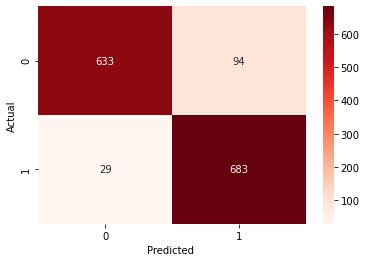

In [522]:
# plotting confusion matrix KNN
cnf_matrix_knn = confusion_matrix(y_test,normalized_df_knn_pred)
ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')
ax.set_xlabel('Predicted ');ax.set_ylabel('Actual'); 




# SVM

In [515]:
svm = SVC()
svm.fit(X_train, y_train)
normalized_df_svm_pred = svm.predict(X_test)
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"****** SVM Method Result ******")
print(f"Test Accuracy :    {round(acc,3)*100}%")
acct=accuracy_score(y_train, svm.predict(X_train))
print(f"Train Accuracy :   {round(acct,3)*100}%")
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"f1 score :         {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"Precision score :  {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"Recall score :     {round(recall,3)*100}%")


C:\Users\afnan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


****** SVM Method Result ******
Test Accuracy :    67.5%
Train Accuracy :   69.5%
f1 score :         67.0%
Precision score :  67.30000000000001%
Recall score :     66.7%


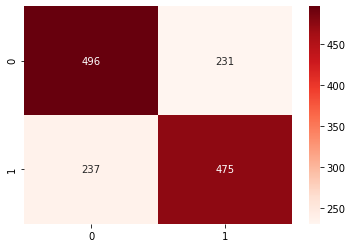

In [516]:
# plotting confusion matrix SVM
cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 